#Q1: Python Programming Basics

##(a) Function Creation: same frequency

Write a function called same frequency which accepts two numbers and returns True if they
contain the same frequency of the digits. Otherwise, return False. You can test your code with
the examples given below:

In [38]:
#import prerequesite library
import numpy as np
import math
import matplotlib.pyplot as plt

In [39]:
def same_frequency(num1,num2):
  str1 = str(num1)
  str2 = str(num2)
  dict1 = {}
  dict2 = {}
  for i in str1:
    if i not in dict1:
      dict1[i] = 1
    else:
      dict1[i] +=1
  for i in str2:
    if i not in dict2:
      dict2[i] = 1
    else:
      dict2[i] +=1
  if dict1!=dict2:
    return False
  else:
    return True

Test results:

In [40]:
print(same_frequency(551122,221515))
print(same_frequency(321142,3212215))
print(same_frequency(12345,31354))
print(same_frequency(1212, 2211))

True
False
False
True


##(b) Matplotlib Data Visualization of K-means Clusters

In [41]:
raw_data = np.load("kmeans.npz")

In [42]:
data = raw_data['data']
pred = raw_data['pred']
centers = raw_data['centers']

In [43]:
# print(f"data\n {data}")
# print(f"pred\n {pred}")
# print(f"centers\n {centers}")

In [44]:
colors = {0:'blue',1:'gray',2:"green",3:"orange"}

In [45]:
unique_labels = np.unique(pred)

In [ ]:
# np.argwhere(pred==1)

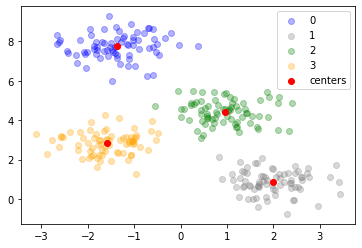

In [46]:
for idx, i in enumerate(unique_labels):
    # plt.plot(pos[0],pos[1])
    spec = data[pred==i]
    
    # print(f" spec.shape {spec.shape}")
    # print(f" i: {i}; len {len(spec)}")
    plt.scatter(spec[:,0],spec[:,1],label=i,alpha=0.3,color = colors[i])
plt.scatter(centers[:,0],centers[:,1],color='red',label="centers")
plt.legend()
plt.show()

#Q2: Regularized Linear Regression
##(a) (10 pts.) Plot the three datasets side by side using blue circles for the data points. On a
given plot, plot the ground truth function as a green line. For example, data10 should look like
Fig. 1.

In [47]:
data10 = np.loadtxt("data10.txt")
data15 = np.loadtxt("data15.txt")
data100 = np.loadtxt("data100.txt")

In [48]:
# data10 #first column input, second column output

In [49]:
x = np.linspace(start=0.0,stop=1.0,num=100)
func_sin = np.sin(2*np.pi*x)

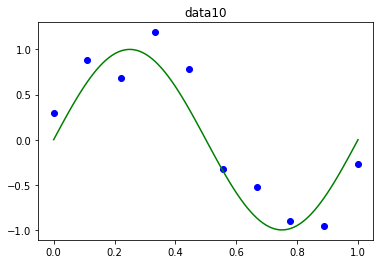

In [50]:
plt.scatter(data10[:,0],data10[:,1],color = "blue",edgecolors="blue")
plt.plot(x,func_sin,'g')
plt.title("data10")
plt.show()

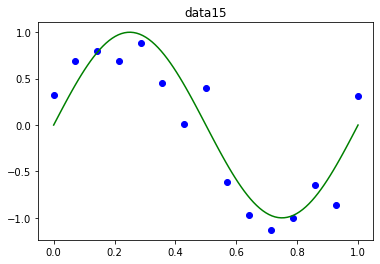

In [51]:
plt.scatter(data15[:,0],data15[:,1],color = "blue",edgecolors="blue")
plt.plot(x,func_sin,'g')
plt.title("data15")
plt.show()

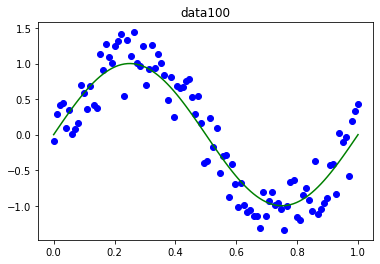

In [52]:
plt.scatter(data100[:,0],data100[:,1],color = "blue",edgecolors="blue")
plt.plot(x,func_sin,'g')
plt.title("data100")
plt.show()

##(b)

In [53]:
# define a buildA function
def buildA(target,m):
    single_A = target[:,0].reshape((len(target),1))
    A = single_A
    for i in range(m-1):
        A = np.concatenate((single_A**(i+2),A),axis=1)
    A = np.concatenate((A,np.ones((len(target),1))),axis=1)
    return A
def secontionb(data,m,k):
  n = len(data[:,0])
  A = buildA(data[:,0].reshape((n,1)), m)
  b = data[:,1].reshape((n,1))
  I = np.identity(m+1)
  I[m] = 0
  lamda = [0,np.exp(-10)]
  # print(f"A.shape {A.shape} b.shape{b.shape} I.shape{I.shape}")
  # c = np.linalg.inv((A.T).dot(A)+lamda[k]*I).dot((A.T).dot(b))
  c = np.linalg.inv(A.T@A + lamda[k] * I)@A.T@b
  # print(f"c {c}\n")
  return A,c,I,b
def drawplt(A,c,data,k):
  predict_y = A @ c
  predict_y = predict_y.flatten()
  # plt.scatter(data[:,0],data[:,1],color = "blue",edgecolors="blue")
  plt.plot(data[:,0],predict_y,'r')
  lambda_title = ["0","exp(-10)"]
  plt.title(f"data{len(data[:,0])} m = {len(c)-1} lambda = {lambda_title[k]}")
  plt.show()




c [[-1.09384447]
 [-0.66283292]
 [ 0.80276877]]



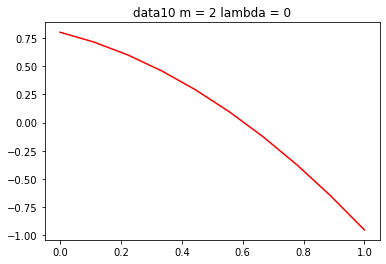

c [[-1.09360143]
 [-0.66304643]
 [ 0.80278999]]



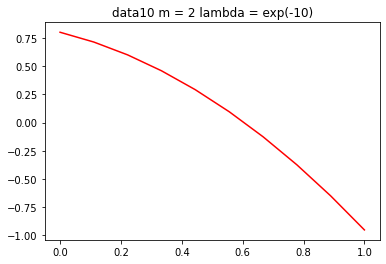

c [[-35.27877254]
 [ 70.13917671]
 [-14.44920513]
 [-29.33996818]
 [  4.91749337]
 [  3.39430931]
 [  0.32921152]]



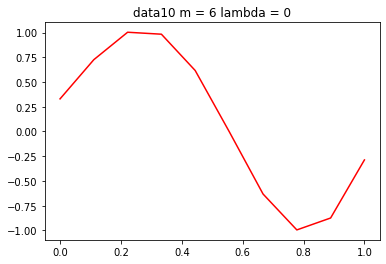

c [[-3.86535379]
 [ 9.54404978]
 [ 6.21580073]
 [-8.51711016]
 [-9.64611561]
 [ 5.71503691]
 [ 0.29506395]]



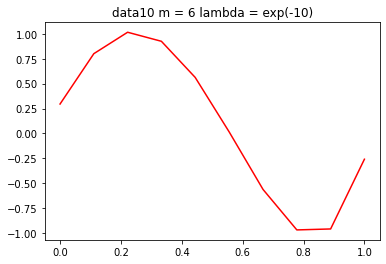

c [[-3.91635950e+04]
 [ 1.67537945e+05]
 [-2.96122386e+05]
 [ 2.78905976e+05]
 [-1.50404029e+05]
 [ 4.63401888e+04]
 [-7.65697365e+03]
 [ 5.70770949e+02]
 [-8.46735731e+00]
 [ 2.99999942e-01]]



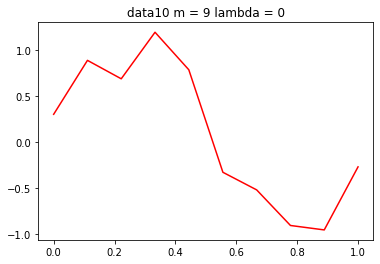

c [[-3.5338486 ]
 [-1.84896842]
 [ 2.29997278]
 [ 6.47141056]
 [ 6.80582425]
 [ 0.25321228]
 [-9.30526316]
 [-6.83132438]
 [ 5.10343135]
 [ 0.30633599]]



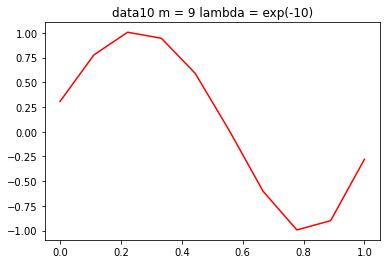

c [[ 1.47756096]
 [-3.12097465]
 [ 1.00544487]]



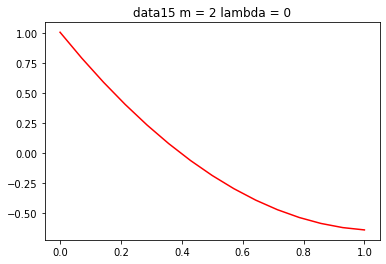

c [[ 1.47561981]
 [-3.11893414]
 [ 1.00509481]]



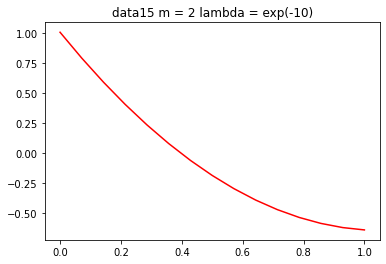

c [[ -1.25424223]
 [ -1.98660865]
 [ 21.50872422]
 [-13.83638848]
 [ -9.16016882]
 [  4.59992351]
 [  0.34863886]]



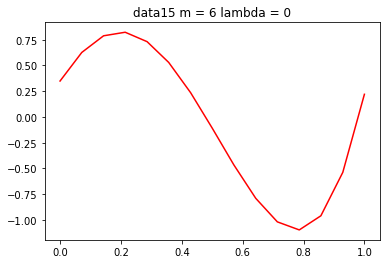

c [[ -2.03675   ]
 [  5.68598222]
 [  6.16034482]
 [ -2.12834588]
 [-12.72211711]
 [  4.92142926]
 [  0.35031548]]



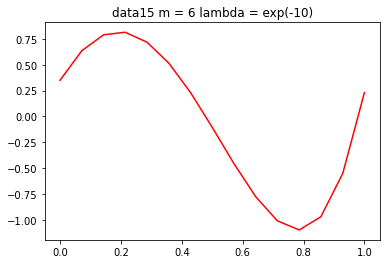

c [[ 1.75232278e+04]
 [-7.39469872e+04]
 [ 1.29505686e+05]
 [-1.22045011e+05]
 [ 6.71387298e+04]
 [-2.18711425e+04]
 [ 4.08409476e+03]
 [-4.08658578e+02]
 [ 2.00480614e+01]
 [ 3.22668412e-01]]



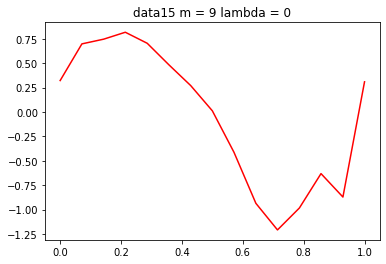

c [[  2.31628497]
 [ -3.48724108]
 [ -2.32384348]
 [  2.433444  ]
 [  6.2482091 ]
 [  4.82652127]
 [ -2.94622439]
 [-11.99855474]
 [  4.80604877]
 [  0.35216585]]



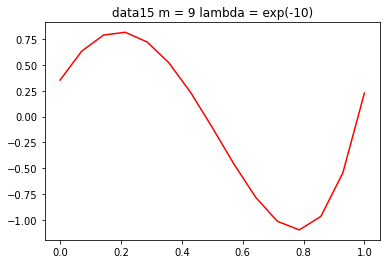

c [[ 0.12128272]
 [-2.04993418]
 [ 0.99435046]]



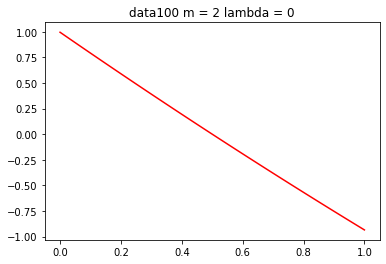

c [[ 0.12111225]
 [-2.04975277]
 [ 0.99431686]]



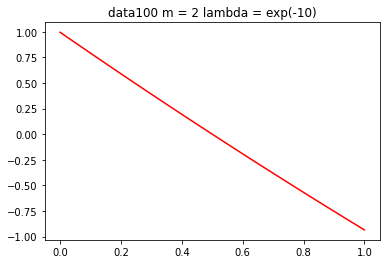

c [[ 1.83364293e+02]
 [-6.27665360e+02]
 [ 8.24548715e+02]
 [-4.89239291e+02]
 [ 1.13777608e+02]
 [-4.63859125e+00]
 [ 2.16530745e-01]]



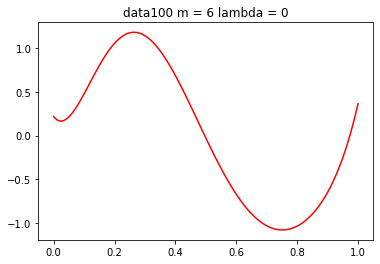

c [[-24.94871017]
 [ 30.77134599]
 [ 30.38930654]
 [-35.69319503]
 [ -8.84522894]
 [  8.71614366]
 [ -0.11929706]]



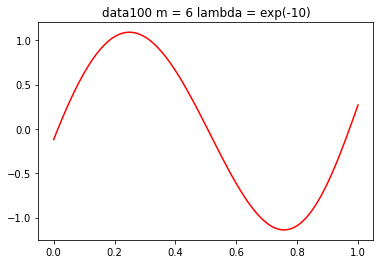

c [[-2.21757952e+03]
 [ 1.15792984e+04]
 [-2.48687771e+04]
 [ 2.86930227e+04]
 [-1.95215418e+04]
 [ 8.13290724e+03]
 [-2.07021022e+03]
 [ 2.84954724e+02]
 [-1.18520420e+01]
 [ 2.71583144e-01]]



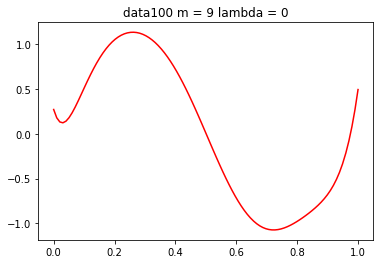

c [[ 17.53893754]
 [-22.00647043]
 [-21.06911984]
 [  7.03985659]
 [ 33.8281617 ]
 [ 20.79696185]
 [-38.38285113]
 [ -5.43884905]
 [  8.07411308]
 [ -0.0974112 ]]



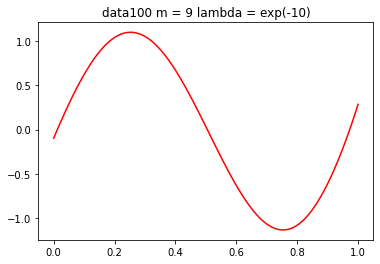

In [54]:
# selected = data10
for j in [data10,data15,data100]:
  for i in [2,6,9]:
    for k in range(2):
      A,c,_,_ = secontionb(j,i,k)
      print(f"c {c}\n")
      drawplt(A,c,j,k)


###From the graph we have, the high degree polynomial performs better than the low degree since it looks really like the $sin$ function we have. However, if we do not have lamda and use the high degree polynomial, the graph is slightly different from the $sin$ function we have. Thus, bring a lamda and use the high degree could be a good solution.

##(c)

$dE(c)/dc = 2 × ((A^T⋅A + λI)⋅c - A^T⋅b)$	

In [57]:
def secontionc(data,m):
  A,_, I, b = secontionb(data,m,1)
  c = np.ones((m+1,1))
  # print(f"A.shape {A.shape}, c.shape {c.shape}, I.shape{I.shape}")
  
  lamda = [0, np.exp(-10)]
  lr = 0.001
  k = 1
  for i in range(1000000):

    gradient = 2* ((A.T@A + lamda[k] * I) @ c - A.T @ b)

    c = c - lr * gradient
  drawplt(A,c,data,1)
  delta = lr * gradient


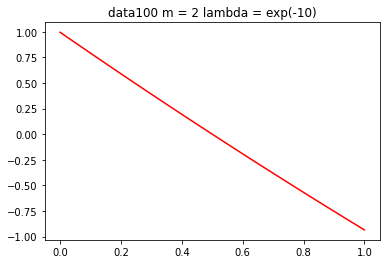

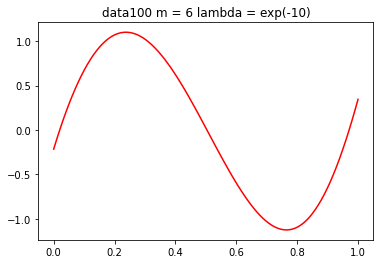

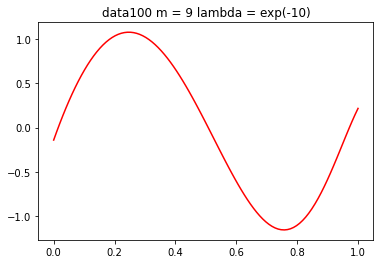

In [58]:
for i in [2,6,9]:
  secontionc(data100,i)

###Also we can notice that the gradient could get stuck if the m is too small to simulate the data. Since 

###Here we could notice that when m equal to 2, the results cannot get convergence. However, when m equal to 6 and 9, the results could get convergence.

#Q3: Temperature Field

##(a)

In [65]:
A = [[0,0,0],[8,6,1],[5,2,8],[8,2,6],[5,1,2],[3,3,3],[9,8,2],[3,6,5],[4,6,9],[1,8,2],[1,1,2],[6,4,2]]
b = [10,15,20,22,16,23,18,19,25,20,28,27]

In [67]:
A = np.array(A)
b = np.array(b).reshape((-1,1))


In [ ]:
print(f"A.shape {A.shape}")
print(f"b.shape {b.shape}")

A.shape (12, 3)
b.shape (12, 1)


In [68]:
#normalize A
meanA = np.mean(A,axis=0)
A = A - meanA
# print(A)
#normalize b
meanb = np.mean(b,axis=0)
b = b - meanb
# print(b)

In [69]:
A = np.concatenate((A,np.ones((len(A),1))),axis=1)
# A

In [70]:
lamda = np.exp(-10)
I = np.identity((4))
I[3] = 0

Here we use the formula to calculate the c.

In [71]:
c = np.linalg.inv(A.T@A + lamda * I)@A.T@b
c.shape

(4, 1)

In [72]:
x = np.array([5,5,5])
x = x-meanA
x = np.concatenate((x,np.array([1])))
x = x.reshape((1,-1))
x.shape

(1, 4)

In [73]:
predict_555 = x @ c
predict_555 = predict_555+meanb
predict_555

array([[21.3890728]])

###Thus, the esitmated temperature is 21.38 Celsius.

##(b)

In [74]:
print(f"x.shape {x.shape}, I.shape{I.shape}, c.shape {c.shape}, b.shape {b.shape}")

x.shape (1, 4), I.shape(4, 4), c.shape (4, 1), b.shape (12, 1)


In [75]:
gradient = c[:-1]

The largest decrease direction is the negative of the gradient direction

In [77]:
max_decrease = - gradient

Then we calculate the unit direction vector.

In [ ]:
norm = np.sqrt(np.sum(max_decrease**2))

In [ ]:
print(norm)

0.7483312290881997


In [ ]:
unit_vec = max_decrease / norm

###Here is the unit vector:

###[0.17934912,-0.15690718,-0.97119207]

In [ ]:
print(unit_vec)

[[ 0.17934912]
 [-0.15690718]
 [-0.97119207]]
